In [1]:
from PIL import Image
import math
import os

import cv2
import numpy as np
import pandas as pd

# matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# tensorflow / keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array

In [2]:
# load the face classifier. The xml files for opencv can be found on the opencv github under opencv/data/haarcascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [3]:
def preprocess_image(image_path):
    # reads the image from the filepath
    image = cv2.imread(image_path)
    
    # convert the image to grayscale in order to use the haar cascade
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # this will detect the face and put it in an array with the x coordinate, y coordinage, width, and height
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # if the faces array is empty, that means no face was found
    if len(faces)==0:
        print("No faces found")
    
    # this will crop out just the area with the face, resize to the appropriate size, and normalize the image
    for (x,y,w,h) in faces:
        just_face = image[y:y+h, x:x+w]
        #just_face = cv2.cvtColor(just_face, cv2.COLOR_BGR2RGB)
        im = Image.fromarray(np.uint8(just_face))
        im = im.resize((48, 48))
        im = img_to_array(im, dtype=np.uint8)
        im = im[:,:,0]
        im = np.expand_dims(im,2)
        #im = np.expand_dims(im,0)
        #im = im[np.newaxis]
        im = im / 255.
        #im = np.expand_dims(im, axis=0)
        # preprocess_input() normalizes input in the scale of [-1, +1]
        #
        #im_normalized = preprocess_input(im)
    return im

In [4]:
cwd = os.getcwd()

In [5]:
# dictionary converting numerical label to human readable label
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [6]:
#loading labels
import pickle
le = pickle.load(open( os.path.join(cwd,"le.pkl"), "rb" ) )

In [7]:
# creating mapping from inital lables to the new label-encoded labels
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{3: 0, 4: 1, 6: 2}


In [8]:
# loading the model
model = keras.models.load_model(os.path.join(cwd,'model.h5'))

In [9]:
# mapping the labels
mapper = {
    0: "happy",
    1: "sad",
    2: "neutral",
}

In [10]:
image_path = 'example_images/005_ps.jpg'
im = preprocess_image(image_path)

Text(0.5, 1.0, 'happy')

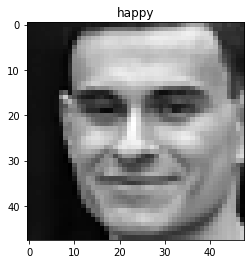

In [11]:
plt.imshow(im, cmap='gray')
im = np.expand_dims(im,0)
prediction = mapper[np.argmax(model.predict(im))]
plt.title(prediction)